# Distance VS Orbital Period
## Defining the lists

In [2]:
# These are the lists
r = [0.0579, 0.1082, 0.1496, 0.2280, 0.7785, 1.4335, 2.8718, 4.4948]
Tp = [0.2408, 0.6152, 1.0000, 1.8808, 11.8618, 29.4566, 84.0107, 164.7858]

$$y=mx+b,\quad m =\frac{y_2-y_1}{x_2-x_1}$$

In [4]:
m = (Tp[-1]-Tp[0])/(r[-1]-r[0])
b = (r[-1]*Tp[0]-r[0]*Tp[-1])/(r[-1]-r[0])
print(m,b)

37.08557776826162 -1.9064549527823478


In [5]:
import matplotlib.pyplot as plt

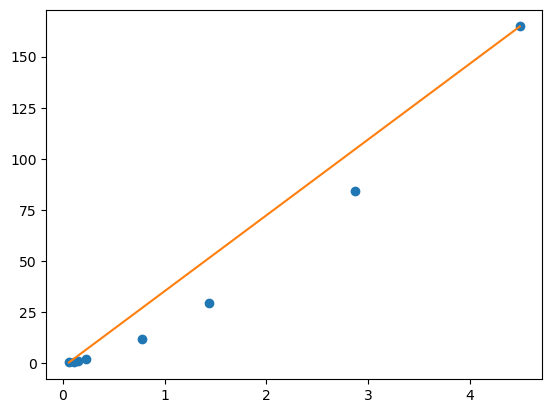

In [6]:
ymod = [m*x+b for x in r]
plt.plot(r, Tp, "o", label="Experimental Data")
plt.plot(r, ymod, label="Linear Model")

A linear model performs very poorly. Let us try a monomial model. 
$$T_P=Ar^{B},$$
$$\log T_P = \log(Ar^{B}) = \log A + \log(r^B) =\log A + B\log(r), \quad \therefore \log T_P = \log A + B\log(r)$$

Let $z = \log r$, and $w=\log T_P$. Then, $w=\log A + Bz$. Let us check it.

In [8]:
from math import log

In [10]:
z = [log(x) for x in r]
w = [log(x) for x in Tp]

In [13]:
B = (w[-1]-w[0])/(z[-1]-z[0])
logA = (z[-1]*w[0]-z[0]*w[-1])/(z[-1]-z[0])
print(B,logA)

1.5001140665782895 2.850093256061342


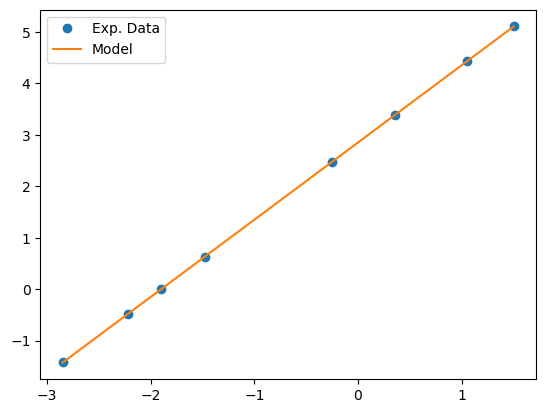

In [14]:
wmod = [logA + B * x for x in z]
plt.plot(z,w, "o", label = "Exp. Data")
plt.plot(z, wmod, label = "Model")
plt.legend()

In [16]:
from math import exp

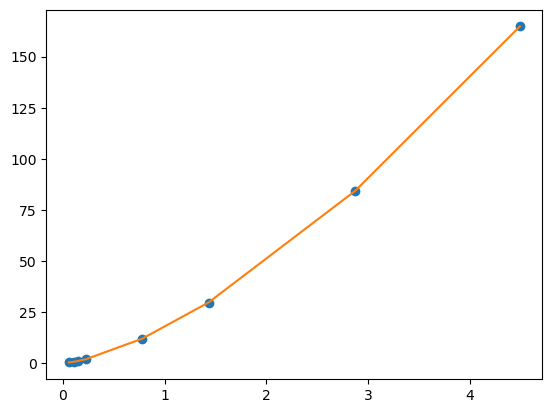

In [17]:
ymod = [exp(logA)* x **B for x in r]
plt.plot(r, Tp, "o", label="Experimental Data")
plt.plot(r, ymod, label="Monomial Model")

# Population Model

In [27]:
t = [1804, 1927, 1960, 1974, 1987, 1999, 2009, 2025, 2050]
P = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.77, 7.95, 9.32]

In [19]:
# Tell me the length of the list
print(len(t))

9


In [23]:
def L(k, x):
    result = 1
    for ii in range(0, 7):
        if ii != k: 
            result = result * (x - t[ii]) / (t[k] - t[ii])
        else:
            pass
    return result

In [21]:
L

<function __main__.L(k, x)>

In [28]:
def pol(x):
    result = 0
    for ii in range(0,7):
        result = result + P[ii] * L(ii, x)
    return result

In [30]:
pol(1927)

2.0

In [32]:
from numpy import linspace

In [35]:
rango = linspace(t[0], t[-1], 100)
len(rango)

100

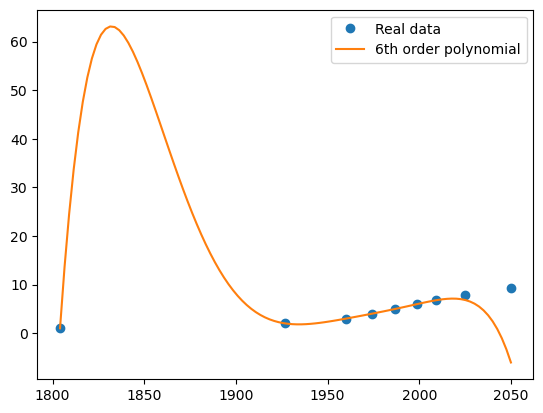

In [37]:
ymod = [pol(x) for x in rango]
plt.plot(t, P, "o", label="Real data")
plt.plot(rango, ymod, label="6th order polynomial")
plt.legend()